In [3]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:\\Users\\Hari\\Desktop\\air-quality-predictor\\AirQualityData\\combined_dataset.csv')

# Create a datetime column
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Set datetime as index
data.set_index('datetime', inplace=True)

# Sort the DataFrame by the datetime index
data.sort_index(inplace=True)

# Check the first few rows of the dataframe
print(data.head())

                          No  year  month  day  hour  PM2.5  PM10   SO2  \
datetime                                                                  
2015-01-01 01:00:00  2261544  2015      1    1     1    NaN   NaN  6.42   
2015-01-01 01:00:00  1067399  2015      1    1     1    NaN   NaN  0.50   
2015-01-01 01:00:00  1697784  2015      1    1     1    NaN   NaN   NaN   
2015-01-01 01:00:00  1394228  2015      1    1     1    NaN   NaN  2.95   
2015-01-01 01:00:00   733580  2015      1    1     1    NaN   NaN  1.50   

                       NO2     CO     O3  TEMP         PRES  DEWP  RAIN  \
datetime                                                                  
2015-01-01 01:00:00  10.65   0.89    NaN   NaN  1019.942798   NaN   NaN   
2015-01-01 01:00:00  39.00    NaN   3.00   NaN  1006.436384   NaN   NaN   
2015-01-01 01:00:00    NaN   0.00    NaN   NaN   982.605457   NaN   NaN   
2015-01-01 01:00:00  14.85   0.19  12.41   NaN  1013.800371   NaN   NaN   
2015-01-01 01:00:00  65.

In [4]:
# Define the training set
train = data['PM2.5'][:'2018-12-31']  # Adjust the date as per your dataset

# Define the testing set
test = data['PM2.5']['2019-01-01':]  # Adjust the date as per your dataset

In [5]:
# Fit the Exponential Smoothing model
model = ExponentialSmoothing(train, trend='add', seasonal=None, seasonal_periods=24).fit()

c:\Users\Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [6]:
# Forecast the values
forecast = model.forecast(len(test))

# Add the forecast to the test dataframe
test = test.copy()
test['Predicted_PM2.5'] = forecast

c:\Users\Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\Hari\\Desktop\\air-quality-predictor\\AirQualityData\\combined_dataset.csv')

# Check the first few rows to verify PM2.5 values
print("Initial data check:")
print(data[['year', 'month', 'day', 'hour', 'PM2.5']].head())


Initial data check:
   year  month  day  hour  PM2.5
0  2017     11   24    17  60.50
1  2017     11   24    18  65.50
2  2017     11   24    19  80.00
3  2017     11   24    20  81.50
4  2017     11   24    21  75.25


In [9]:
# Convert columns to integer type
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)
data['hour'] = data['hour'].astype(int)


In [10]:
def create_datetime_str(row):
    try:
        return f"{int(row['year'])}-{int(row['month']):02d}-{int(row['day']):02d} {int(row['hour']):02d}:00:00"
    except ValueError:
        return pd.NaT

# Create a new column 'datetime_str' for slicing
data['datetime_str'] = data.apply(create_datetime_str, axis=1)

# Drop rows where 'datetime_str' could not be created
data = data.dropna(subset=['datetime_str'])

# Sort the data by 'datetime_str' for consistent slicing
data.sort_values('datetime_str', inplace=True)


In [11]:
# Drop rows with NaN values in 'PM2.5' for the entire dataset
data = data.dropna(subset=['PM2.5'])

# After cleaning, re-create training and testing sets if needed
train = data[data['datetime_str'] <= '2018-12-31']
test = data[data['datetime_str'] >= '2019-01-01']

# Check the results
print("\nCleaned training set:")
print(train.head())

print("\nCleaned testing set:")
print(test.head())


Cleaned training set:
            No  year  month  day  hour   PM2.5    PM10   SO2    NO2    CO  \
485877  485878  2015      1    1     1  310.65     NaN  8.23  17.73   NaN   
285144  285145  2015      1    1     1  598.51  935.18   NaN  35.69  0.58   
485878  485879  2015      1    1     2  224.96     NaN  8.13  19.20   NaN   
285145  285146  2015      1    1     2  655.93     NaN   NaN  35.58  0.55   
285146  285147  2015      1    1     3  657.68     NaN   NaN  35.45  0.51   

            O3  TEMP         PRES  DEWP  RAIN          wd       WSPM  station  \
485877     NaN   NaN  1028.365709   NaN   NaN  144.470231  13.371459      NaN   
285144  108.02   NaN  1014.166480   NaN   NaN  277.478452   2.896550      NaN   
485878     NaN   NaN  1047.740289   NaN   NaN  269.142737   8.711257      NaN   
285145  121.38   NaN  1031.915247   NaN   NaN  197.230517   8.372552      NaN   
285146     NaN   NaN   994.794504   NaN   NaN   47.021617  12.176558      NaN   

               datetime_str

In [12]:
# Define the training set using the 'datetime_str' column
train = data[data['datetime_str'] <= '2018-12-31']

# Define the testing set using the 'datetime_str' column
test = data[data['datetime_str'] >= '2019-01-01']

# Check the first few rows of train and test sets
print("\nTraining set check:")
print(train[['datetime_str', 'PM2.5']].head())

print("\nTesting set check:")
print(test[['datetime_str', 'PM2.5']].head())


Training set check:
               datetime_str   PM2.5
485877  2015-01-01 01:00:00  310.65
285144  2015-01-01 01:00:00  598.51
485878  2015-01-01 02:00:00  224.96
285145  2015-01-01 02:00:00  655.93
285146  2015-01-01 03:00:00  657.68

Testing set check:
                datetime_str   PM2.5
1155646  2019-01-01 00:00:00  444.00
320207   2019-01-01 00:00:00  458.64
2402219  2019-01-01 00:00:00  398.64
1429290  2019-01-01 00:00:00   64.22
1732846  2019-01-01 00:00:00   77.10


c:\Users\Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hari\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hari\AppData\Local\Prog


Actual vs Predicted values:
          PM2.5  Predicted_PM2.5
1155646  444.00       332.375214
320207   458.64              NaN
2402219  398.64              NaN
1429290   64.22       332.375214
1732846   77.10       332.375214
...         ...              ...
1000313   18.69       332.375214
1046263   38.00       332.375214
1115589   48.21       332.375214
1518436   23.00       332.375214
2589082   10.50              NaN

[1084627 rows x 2 columns]


C:\Users\Hari\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


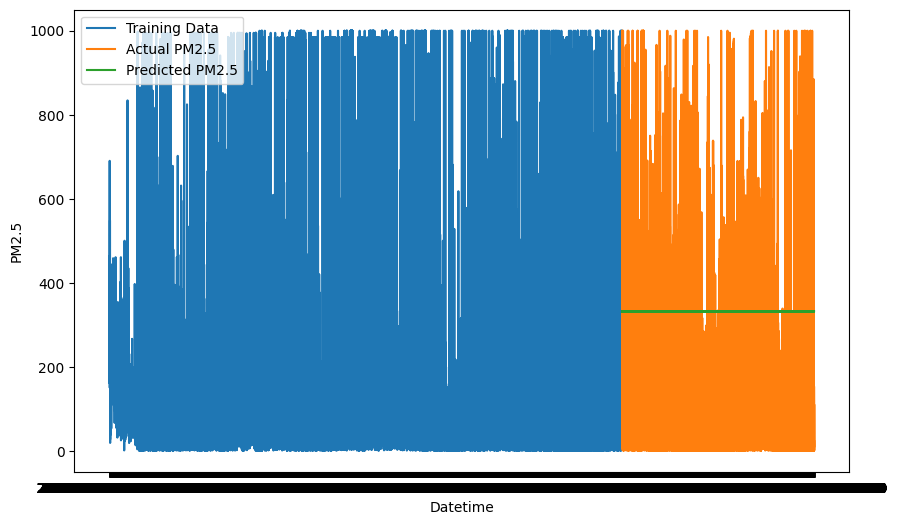

Execution Time: 594.3441984653473 seconds


In [13]:
import time
from statsmodels.tsa.arima.model import ARIMA

start_time = time.time()

# Fit the ARIMA model on the training data
model = ARIMA(train['PM2.5'].dropna(), order=(1, 1, 1))
model_fit = model.fit()

# Forecast the values for the test set
test['Predicted_PM2.5'] = model_fit.forecast(steps=len(test))

# Check the actual and predicted values
print("\nActual vs Predicted values:")
print(test[['PM2.5', 'Predicted_PM2.5']])

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train['datetime_str'], train['PM2.5'], label='Training Data')
plt.plot(test['datetime_str'], test['PM2.5'], label='Actual PM2.5')
plt.plot(test['datetime_str'], test['Predicted_PM2.5'], label='Predicted PM2.5')
plt.xlabel('Datetime')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

end_time = time.time()
print(f"Execution Time: {end_time - start_time} seconds")
